# EDA

In [2]:
!pip install seaborn

     -------------------------------------- 285.1/285.1 kB 8.9 MB/s eta 0:00:00


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [143]:
train = pd.read_csv('data/train.csv') 

In [144]:
train = train.drop(['id'],axis=1)

In [145]:
train

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


# 상관계수

- 변수들간에 서로 선형적 관계가 있는지 확인
- 0.3 이상만 되도 충분히 상관이 있다고 할 수 있다.
- 단, 비선형적 관계인경우 수치로 판단이 안된다.

In [146]:
train.corr()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293
count,0.626047,0.619404,-0.163985,0.459906,-0.471142,0.299094,0.477614,-0.114288,-0.134293,1.000000


<AxesSubplot: >

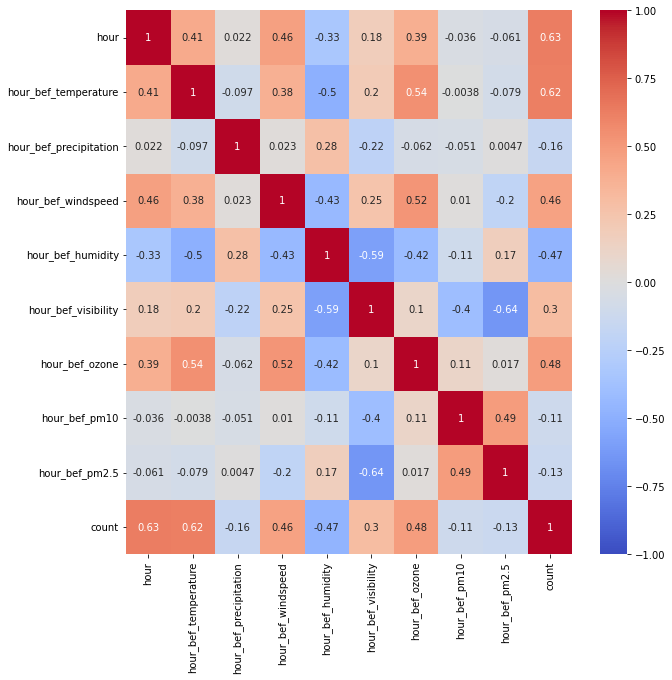

In [147]:
plt.figure(figsize=(10,10))
sns.heatmap(data= train.corr(), cmap='coolwarm', annot=True, vmax=1, vmin=-1) 

- 이정도면 모든 변수가 상관있다고 할 수 있다.
- 시간과 온도,오존,풍속,가 증가 할수록 
- 의외로 미세먼지가 영향이 적다. (빼고 확인하거나, 새로운 변수를 만들어 볼까?)
- 강수여부는 (0,1) binary 라서 지금은 판단이 어렵다. (그림을 그려서 판단)


아이디어

- 오존양과 온도는 같은 역할을 하는게 아닐까?
- temp * humidity로 불쾌지수 변수 만들 수 있을까.
- pm * 전날 강수여부는 어떨까? (전날 비가오면 pm이 떨어지기 때문에)
- temp로 계절을 확인 가능할까? (x)
- visibility,pm 은 같은 역할을 한 것으로 보인다.



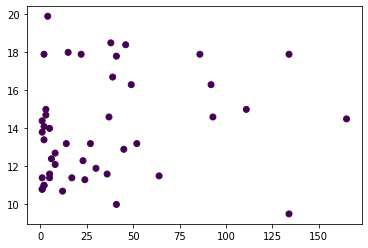

In [14]:
train_rain = train[train['hour_bef_precipitation'] == 1]
train_no_rain =train[train['hour_bef_precipitation'] == 0]



plt.scatter(train_rain['count'],train_rain['hour_bef_temperature'],c=train_rain['hour_bef_precipitation'])
#plt.scatter(train_no_rain['count'],train_no_rain['hour_bef_temperature'],c=train_no_rain['hour_bef_precipitation'])

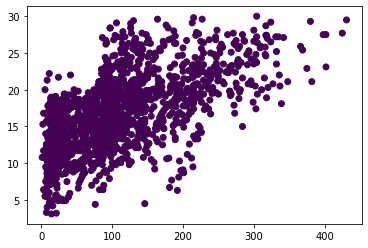

In [15]:
plt.scatter(train_no_rain['count'],train_no_rain['hour_bef_temperature'],c=train_no_rain['hour_bef_precipitation'])

# hour  변수 & count

- 시간별 얼마나 빌렸는지 분석해보자
- 시간별 평균 count를 구해보자

<AxesSubplot: xlabel='count', ylabel='Count'>

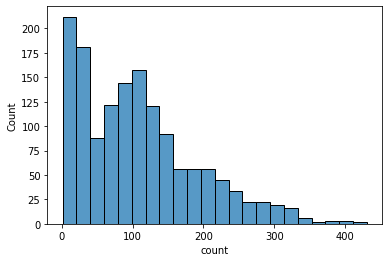

In [41]:
sns.histplot(x=train['count'])
#20개 이하로 가장 많은 것을 볼 수 있다.

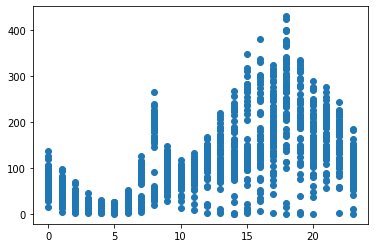

In [29]:
plt.scatter(train['hour'],train['count'])

#count가 0인 경우는 뭐지?

<AxesSubplot: xlabel='hour'>

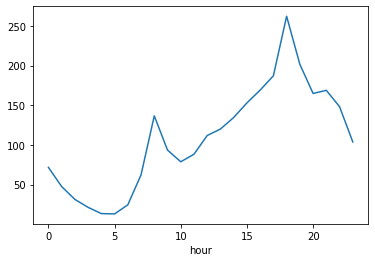

In [10]:
train.groupby(['hour'])['count'].mean().plot()

Text(16, 150, 'leave work')

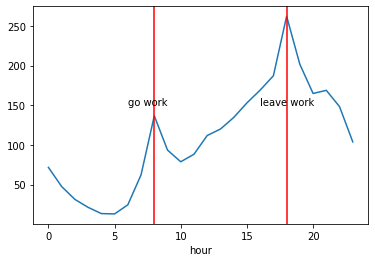

In [11]:
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, 'go work')
plt.text(16, 150, 'leave work')

count가 0인 경우 확인

In [34]:
train[train['count']<10]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
10,4,5.7,0.0,0.6,77.0,1960.0,0.028,14.0,18.0,6.0
15,13,14.0,1.0,2.8,42.0,1518.0,0.030,49.0,37.0,5.0
59,5,15.0,1.0,1.2,88.0,203.0,0.026,35.0,24.0,3.0
72,2,6.4,0.0,0.9,58.0,1039.0,0.031,72.0,56.0,3.0
101,3,11.7,0.0,3.9,98.0,150.0,0.041,20.0,20.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1302,4,9.4,0.0,1.4,82.0,528.0,0.013,80.0,39.0,9.0
1304,3,9.4,0.0,0.9,87.0,387.0,0.006,45.0,NaN,8.0
1422,5,15.7,0.0,1.2,63.0,688.0,0.026,118.0,74.0,7.0
1443,2,11.4,1.0,0.9,89.0,289.0,0.017,67.0,57.0,5.0


In [19]:
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

여기서 얻은 인사이트

- go work 와 leave work쪽에 증가하는 방향으로 dummy variable을 주면 성능이 향상할 것으로 보인다. 
- 시간이 증가하면, 자전거 대여수는 높아진다고 말할 수 있다.

In [41]:
train[(train['hour'] ==8 ) | (train['hour'] == 18)]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,work,leave
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,0,1
19,34,18,18.0,1.0,1.9,82.0,685.0,0.044,99.0,42.0,15.0,0,1
21,36,8,12.6,0.0,5.3,53.0,1576.0,0.014,52.0,40.0,209.0,1,0
104,160,8,19.4,0.0,2.7,71.0,627.0,0.053,68.0,39.0,191.0,1,0
107,165,18,25.4,0.0,3.4,33.0,2000.0,0.060,40.0,21.0,369.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,2090,18,27.5,0.0,3.8,47.0,1507.0,0.083,64.0,40.0,398.0,0,1
1415,2121,8,8.6,0.0,2.0,89.0,223.0,0.010,74.0,64.0,34.0,1,0
1427,2138,18,28.1,0.0,4.4,25.0,862.0,0.125,94.0,53.0,300.0,0,1
1436,2154,18,20.3,0.0,4.7,25.0,1994.0,0.053,43.0,20.0,242.0,0,1


In [17]:
#새로운 변수 추가
train['work'] = 0

In [45]:

train.loc[(train['hour'] ==8 ) | (train['hour'] == 18), 'work'] = 1


In [43]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,work,leave
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,0,0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,0,0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,0,0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,0,0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,0,0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,0,0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,0,0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,0,0


# 나머지 분포들

- 기온에 따른 count
- 풍속에 따른 count 
- 습도에 따른 count
- visibility에 따른 count
- pm10에 따른 count
- pm2.5에 따른 count

## 강수 여부

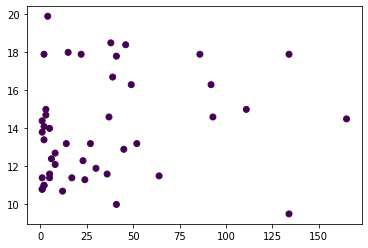

In [18]:
train_rain = train[train['hour_bef_precipitation'] == 1]
train_no_rain =train[train['hour_bef_precipitation'] == 0]



plt.scatter(train_rain['count'],train_rain['hour_bef_temperature'],c=train_rain['hour_bef_precipitation'])
#plt.scatter(train_no_rain['count'],train_no_rain['hour_bef_temperature'],c=train_no_rain['hour_bef_precipitation'])

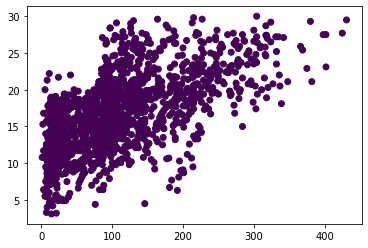

In [19]:
plt.scatter(train_no_rain['count'],train_no_rain['hour_bef_temperature'],c=train_no_rain['hour_bef_precipitation'])

In [20]:
train_rain['hour_bef_precipitation']
# 강수 변수 제거 필요.
# 계절이 가을~겨울인가?

0       1.0
15      1.0
17      1.0
19      1.0
48      1.0
59      1.0
130     1.0
154     1.0
169     1.0
222     1.0
299     1.0
306     1.0
309     1.0
323     1.0
333     1.0
344     1.0
363     1.0
380     1.0
387     1.0
436     1.0
495     1.0
507     1.0
539     1.0
583     1.0
590     1.0
605     1.0
636     1.0
692     1.0
713     1.0
718     1.0
765     1.0
796     1.0
798     1.0
814     1.0
842     1.0
911     1.0
984     1.0
1040    1.0
1109    1.0
1139    1.0
1231    1.0
1245    1.0
1272    1.0
1288    1.0
1413    1.0
1443    1.0
Name: hour_bef_precipitation, dtype: float64

## 기온

<AxesSubplot: xlabel='hour_bef_temperature', ylabel='Count'>

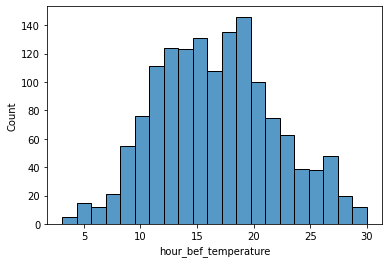

In [43]:
sns.histplot(x=train['hour_bef_temperature'])
# 계절이 섞여 있는 것을 볼 수 있고 구분하긴 어렵다.

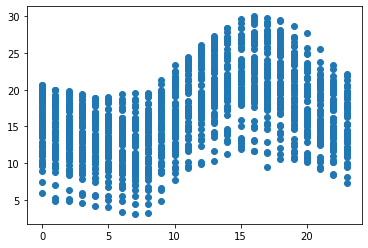

In [26]:
plt.scatter(train['hour'],train['hour_bef_temperature'])

이것만 봐서는 계절 판단은 어렵다.

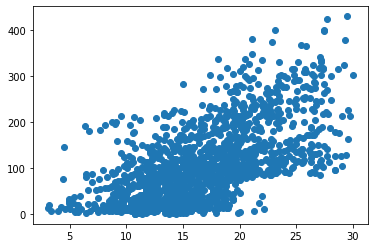

In [27]:
plt.scatter(train['hour_bef_temperature'],train['count'])

온도와 count는 상당히 유사한 분포를 띄는것으로 보인다.

날씨가 따뜻해지면 자전거를 탄다. or 날이 따뜻한 계절

매우 강한 선형관계를 보인다.

영등포 시간별 날씨를 보고 계절을 나누는 것도 가능하다.

## 풍속

<AxesSubplot: xlabel='hour_bef_windspeed', ylabel='Count'>

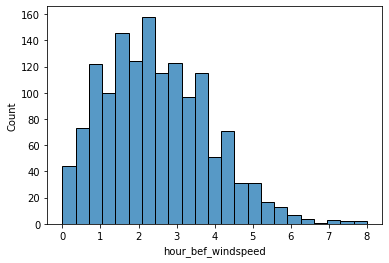

In [49]:
sns.histplot(x=train['hour_bef_windspeed'])
# log 변환을 통해 정규화 해줄 필요있다

<AxesSubplot: xlabel='hour_bef_windspeed', ylabel='Count'>

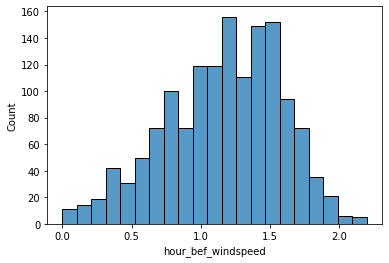

In [51]:
sns.histplot(x=np.log1p(train['hour_bef_windspeed']))

In [ ]:
#풍속이 0인 경우

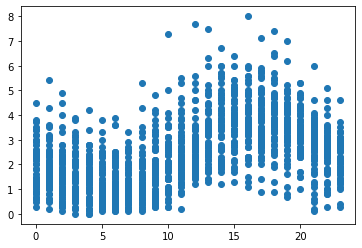

In [48]:
plt.scatter(train['hour'],train['hour_bef_windspeed'])

## 습도

<AxesSubplot: xlabel='hour_bef_humidity', ylabel='Count'>

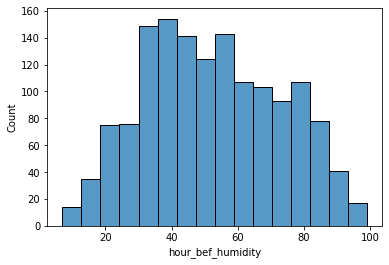

In [44]:
sns.histplot(x=train['hour_bef_humidity'])
# 계절이 섞여 있는 것을 볼 수 있고 구분하긴 어렵다.

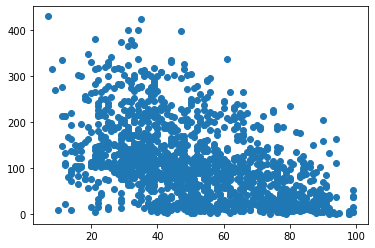

In [58]:
plt.scatter(train['hour_bef_humidity'],train['count'])
#선형적으로 감소하는 추세가 보인다.

In [53]:
#새 컬럼 만들기
train['new_bad']=train['hour_bef_humidity'] * train['hour_bef_temperature']

<AxesSubplot: xlabel='new_bad', ylabel='Count'>

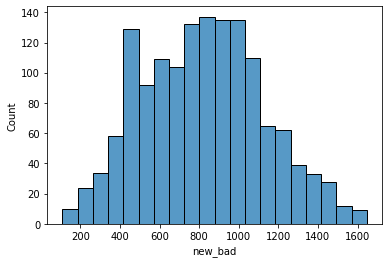

In [54]:
sns.histplot(x=train['new_bad'])
# 계절이 섞여 있는 것을 볼 수 있고 구분하긴 어렵다.

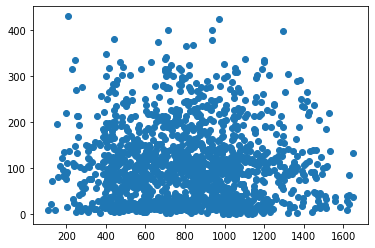

In [57]:
plt.scatter(train['new_bad'],train['count'])
#새 컬럼은 별로 좋지 못하다.

In [55]:
train.corr()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,new_bad
hour,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047,-0.017629
hour_bef_temperature,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404,0.301206
hour_bef_precipitation,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985,0.197006
hour_bef_windspeed,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906,-0.159257
hour_bef_humidity,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142,0.628666
hour_bef_visibility,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094,-0.442530
hour_bef_ozone,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614,-0.032080
hour_bef_pm10,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288,-0.071137
hour_bef_pm2.5,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293,0.121672
count,0.626047,0.619404,-0.163985,0.459906,-0.471142,0.299094,0.477614,-0.114288,-0.134293,1.000000,-0.022016


## visibility

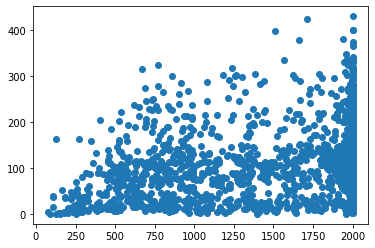

In [60]:
plt.scatter(train['hour_bef_visibility'],train['count'])
#증가하긴 하지만,
#너무 분산이 커보인다.

## pm

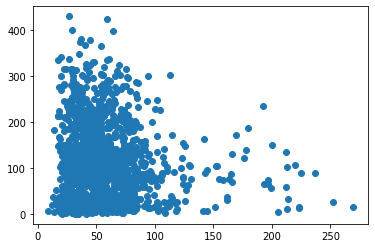

In [131]:
plt.scatter(train['hour_bef_pm10'],train['count'])
#별로 좋은 feature는 아니다.

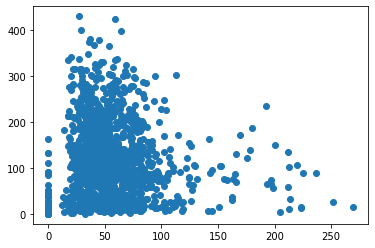

In [134]:
# pm * 전날 강수여부는 어떨까?

train['hour_bef_precipitation'] = (train['hour_bef_precipitation'] +1) %2
train['new_pm']=train['hour_bef_precipitation'] * train['hour_bef_pm10']



plt.scatter(train['new_pm'],train['count'])
#여전히 좋은 피처는 아니다.


## shap

- 데이터 전처리시, 제출 횟수를 아끼는 꿀팁

In [62]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 9.0 MB/s eta 0:00:00
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
     ---------------------------------------- 2.5/2.5 MB 10.5 MB/s eta 0:00:00
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
     ------------------------------------- 952.8/952.8 kB 10.0 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.3.0
    Uninstalling setuptools-65.3.0:
      Successfully uninstalled setuptools-65.3.0
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [135]:
import shap

In [136]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [137]:
train = pd.read_csv('data/train.csv') 
 

In [138]:
train = train.drop(['id'],axis=1)


train['new_bad']=train['hour_bef_humidity'] * train['hour_bef_temperature']

train['hour_bef_precipitation'] = (train['hour_bef_precipitation'] +1) %2
train['new_pm']=train['hour_bef_precipitation'] * train['hour_bef_pm10']

#나머지 데이터 0으로 채우기
train.fillna(0,inplace = True)


train_x = train.drop(['count'],axis=1)
train_y = train['count']


In [139]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [140]:
shap.initjs()
explainer = shap.TreeExplainer(model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer(train_x) # Shap Values 계산


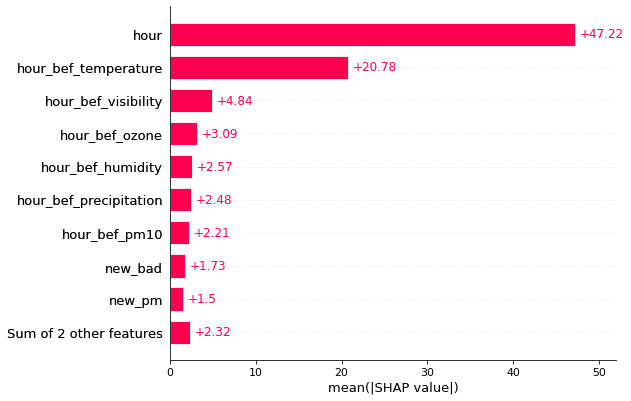

In [141]:
shap.plots.bar(shap_values)

random forest모델에서는 아래 피쳐들이 결과값에 큰 차이를 보이지 않는다는 뜻.

자전거 대여량은 전날 날씨보다는 오늘 날씨에 기반하기 때문이라 생각.

그리고 요일, 휴일 등 날짜 주기와 더 큰 연관이 있을 것.

아주 약간의 차이는 랜덤성에 있을 것.

다른 모델들을 확인해보자.
